In [1]:
import torch
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def PCA(data, k=2):
    X = data
    X_mean = torch.mean(X,0)
    X = X - X_mean.expand_as(X)
    U,S,V = torch.svd(torch.t(X))
    return torch.mm(X,U[:,:k])

10


In [5]:
label_names = {
    0 : "airplane",
    1 : "automobile",
    2 : "bird",
    3 : "cat",
    4 : "deer",
    5 : "dog",
    6 : "frog",
    7 : "horse",
    8 : "ship",
    9 : "truck"
}

In [6]:
lens = []
for i in range(10):
    lens.append(clusters[i].shape[0])
print(lens)

[4957, 4935, 4955, 4944, 4936, 4970, 4945, 4950, 4952, 4956]


bird cat deer dog automobile truck


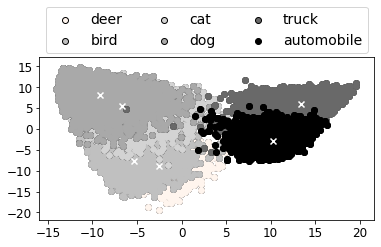

In [7]:
plt.figure(figsize=(6,3))
one = 2
two = 3
three = 4
four = 5
five = 1
six = 9
seven = 6
eight = 7 

c1 = torch.sum(clusters[one], dim = 0)/clusters[one].shape[0]
c2 = torch.sum(clusters[two], dim = 0)/clusters[two].shape[0]
c3 = torch.sum(clusters[three], dim = 0)/clusters[three].shape[0]
c4 = torch.sum(clusters[four], dim = 0)/clusters[four].shape[0]
c5 = torch.sum(clusters[five], dim = 0)/clusters[five].shape[0]
c6 = torch.sum(clusters[six], dim = 0)/clusters[six].shape[0]
c7 = torch.sum(clusters[seven], dim = 0)/clusters[seven].shape[0]
c8 = torch.sum(clusters[eight], dim = 0)/clusters[eight].shape[0]

print(label_names[one], label_names[two], label_names[three], label_names[four], label_names[five], label_names[six])
x = np.array(
                PCA(torch.cat((clusters[one], clusters[two], 
                               clusters[three], clusters[four],
                               clusters[five], clusters[six],
                               c1.reshape(1,-1), c2.reshape(1,-1), 
                               c3.reshape(1,-1), c4.reshape(1,-1),
                               c5.reshape(1,-1), c6.reshape(1,-1)
                              )
                             )).cpu()
            )

plt.scatter(x[:,0][lens[one]+lens[two]:lens[one]+lens[two]+lens[three]], x[:,1][lens[one]+lens[two]:lens[one]+lens[two]+lens[three]], color = 'seashell', label = label_names[three], edgecolors = 'black')
plt.scatter(x[:,0][lens[one]+lens[two]:lens[one]+lens[two]+lens[three]], x[:,1][lens[one]+lens[two]:lens[one]+lens[two]+lens[three]], color = 'seashell')

plt.scatter(x[:,0][:lens[one]], x[:,1][:lens[one]], color = 'silver', label = label_names[one], edgecolors = 'black')
plt.scatter(x[:,0][:lens[one]], x[:,1][:lens[one]], color = 'silver')

plt.scatter(x[:,0][lens[one]:lens[one]+lens[two]], x[:,1][lens[one]:lens[one]+lens[two]], color = 'lightgrey', label = label_names[two], edgecolors = 'black')
plt.scatter(x[:,0][lens[one]:lens[one]+lens[two]], x[:,1][lens[one]:lens[one]+lens[two]], color = 'lightgrey')

plt.scatter(x[:,0][lens[one]+lens[two]+lens[three]:lens[one]+lens[two]+lens[three]+lens[four]], x[:,1][lens[one]+lens[two]+lens[three]:lens[one]+lens[two]+lens[three]+lens[four]], color = 'darkgray', label = label_names[four], edgecolors='black')
plt.scatter(x[:,0][lens[one]+lens[two]+lens[three]:lens[one]+lens[two]+lens[three]+lens[four]], x[:,1][lens[one]+lens[two]+lens[three]:lens[one]+lens[two]+lens[three]+lens[four]], color = 'darkgray')

plt.scatter(x[:,0][lens[one]+lens[two]+lens[three]+lens[four]+lens[five]:lens[one]+lens[two]+lens[three]+lens[four]+lens[five]+lens[six]], x[:,1][lens[one]+lens[two]+lens[three]+lens[four]+lens[five]:lens[one]+lens[two]+lens[three]+lens[four]+lens[five]+lens[six]], color = 'dimgray', label = label_names[six], edgecolors='black')
plt.scatter(x[:,0][lens[one]+lens[two]+lens[three]+lens[four]+lens[five]:lens[one]+lens[two]+lens[three]+lens[four]+lens[five]+lens[six]], x[:,1][lens[one]+lens[two]+lens[three]+lens[four]+lens[five]:lens[one]+lens[two]+lens[three]+lens[four]+lens[five]+lens[six]], color = 'dimgray')

plt.scatter(x[:,0][lens[one]+lens[two]+lens[three]+lens[four]:lens[one]+lens[two]+lens[three]+lens[four]+lens[five]], x[:,1][lens[one]+lens[two]+lens[three]+lens[four]:lens[one]+lens[two]+lens[three]+lens[four]+lens[five]], color = 'black', label = label_names[five], edgecolors='black')
plt.scatter(x[:,0][lens[one]+lens[two]+lens[three]+lens[four]:lens[one]+lens[two]+lens[three]+lens[four]+lens[five]], x[:,1][lens[one]+lens[two]+lens[three]+lens[four]:lens[one]+lens[two]+lens[three]+lens[four]+lens[five]], color = 'black')


plt.scatter(x[:,0][-6], x[:,1][-6], color = 'white', marker = 'x')
plt.scatter(x[:,0][-5], x[:,1][-5], color = 'white', marker = 'x')
plt.scatter(x[:,0][-4], x[:,1][-4], color = 'white', marker = 'x')
plt.scatter(x[:,0][-3], x[:,1][-3], color = 'white', marker = 'x')
plt.scatter(x[:,0][-2], x[:,1][-2], color = 'white', marker = 'x')
plt.scatter(x[:,0][-1], x[:,1][-1], color = 'white', marker = 'x')

plt.legend(loc="upper center", ncol = 3, bbox_to_anchor=(0.5, 1.35), fontsize = 14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()
#plt.savefig('clusters.pdf', bbox_inches="tight", dpi=100)